In [562]:
#file Locations
trainFileLocation = "/Users/pranav/Desktop/CS584/HW2/train.csv"
testFileLocation ="/Users/pranav/Desktop/CS584/HW2/test.csv"
outputLocation="/Users/pranav/Desktop/CS584/HW2/output.csv"

In [563]:
#%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [564]:
k = pd.read_csv(trainFileLocation, names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","heartdisease::category|-1|1"])
k = k.drop(0)
k = k.astype(float)#string values to float
x=k.drop(columns=["heartdisease::category|-1|1"])
y = k.iloc[:, -1].values.reshape(-1, 1)

print(k.shape)

(152, 14)


In [565]:
#please uncomment this complete box to include scaling of features 

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

In [566]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0
5,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0
149,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0
150,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
151,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [567]:
weights = np.ones((13, 1))
#weights = np.abs(np.random.randn(13, 1) * 0.01)
print(weights)
print(weights.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(13, 1)


In [568]:
def dotP(x,weights):#dot product and conversion to float 128 because exp is giving exception
    z= np.float128(np.dot(x,weights))
    return z

In [569]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [570]:
nonZeroFactor =0.000001# it will be added to avaoid log(0) which is infinity.

In [571]:
def compute_cost_and_gradients(X, y, weights):
    m = X.shape[0]
    
    dotSig = sigmoid(dotP(X, weights))
    dotSig =  np.array(dotSig >= 0.5).astype(int)#converting y_pred into array of 0 and 1
    a = -np.sum(y * np.log(dotSig+nonZeroFactor) + (1 - y) * np.log(1 - dotSig+nonZeroFactor))
    cost = a / m
    
    grad = np.dot(X.T, (dotSig - y)) / m
    
    return cost, grad

In [572]:
from sklearn.metrics import log_loss
def calulateCrossEntropy(x,y,weights):
    yPredict = sigmoid(dotP(x, weights))
    
    m=y.shape[0]
    
    z = yPredict
    yPredict= np.zeros(m)
    for i in range(m):        
        if z[i] >= 0.5:
            yPredict[i]=1
        else:
            yPredict[i]=0
    
    trueYArr= np.zeros(len(y))
    for i in range(len(y)):        
        trueYArr[i]= y[i]

    return log_loss(trueYArr, yPredict)

In [573]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
def calulateClassificationError(x,y,weights):
    yPredic = sigmoid(dotP(x, weights))
    
    m=y.shape[0]
    
    z = yPredic
    yPredic= np.zeros(m)
    for i in range(m):        
        if z[i] >= 0.5:
            yPredic[i]=1
        else:
            yPredic[i]=0
    
    trueYArr= np.zeros(len(y))
    for i in range(len(y)):        
        trueYArr[i]= y[i]
    
    return 1-np.mean(yPredic == trueYArr)


In [574]:
def train_logistic_regression(X, y , learning_rate, num_iterations, weights):
    costs = []
    crossError=[]
    classificError=[]
    
    for i in range(num_iterations):
        cost, grad = compute_cost_and_gradients(X, y, weights)
        costs.append(cost)
        weights = weights - learning_rate * grad
        #print("Iteration : %i cost : %f " % (i, cost))
        
        if i % 5 == 0:
            crossError.append(calulateCrossEntropy(x,y,weights))
            classificError.append(calulateClassificationError(x,y,weights))
        
        if np.all(np.abs(grad) < 1e-3):
            break
            
    return weights, costs ,crossError, classificError

In [575]:
def predict_logistic_regression(x, weights):
    threshold=0.5
    m=x.shape[0]
    
    y_pred_prob = sigmoid(dotP(x, weights))

    z = y_pred_prob
    y_pred= np.zeros(m)
    for i in range(m):        
        if z[i] >= 0.5:
            y_pred[i]=1
        else:
            y_pred[i]=-1
    
    return y_pred

In [576]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [577]:
import time

iter=100000
learningRate=1e-5
#learningRate=1e-6

startTime=time.time()

weights, cost, crossError, classificError = train_logistic_regression(X_train, np.array(y_train >= 0.5).astype(int), learningRate , iter, weights)

endTime=time.time()

print("Time consumed for training is : ",endTime-startTime)

y_pred = predict_logistic_regression(X_train, weights)

trueYArr= np.zeros(len(y_train))
for i in range(len(y_train)):        
    trueYArr[i]= y_train[i]

crossEntropyError = log_loss(trueYArr, y_pred)
print("OverAll cross Entropy Error :",crossEntropyError)

classification_error = 1 - accuracy_score(trueYArr, y_pred)
print("overall classification Error :",classification_error)


Time consumed for training is :  43.8339159488678
OverAll cross Entropy Error : 8.480859620968742
overall classification Error : 0.23529411764705888


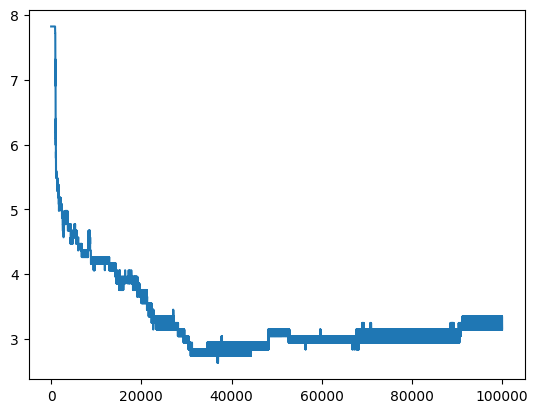

In [578]:
#cost vs iteration graph for comparison
plt.plot(range(0,iter),cost)  

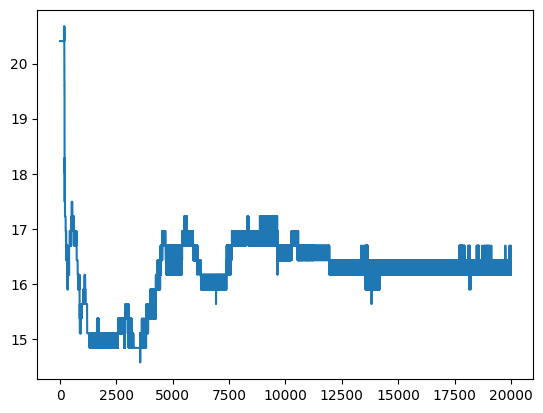

In [579]:
#please uncomment this box to plot cross entropy error graph
plt.plot(range(0,len(crossError)),crossError)  

In [580]:
#classification error graph
#plt.plot(range(0,len(classificError)),classificError) 

In [581]:
def accuracy(trueY, predY):
    trueYArr= np.zeros(len(trueY))
    for i in range(len(trueY)):        
        trueYArr[i]= trueY[i]

    count = np.sum(trueYArr == predY)
    
    return count/len(trueY)

In [582]:
def precision(trueY, predY):
    trueYArr= np.zeros(len(trueY))
    for i in range(len(trueY)):        
        trueYArr[i]= trueY[i]
    
    tp = np.sum((trueYArr == 1) & (predY == 1))
    fp = np.sum((trueYArr == -1) & (predY == 1))
    return tp / (tp + fp)

In [583]:
def recall(trueY, predY):
    trueYArr= np.zeros(len(trueY))
    for i in range(len(trueY)):        
        trueYArr[i]= trueY[i]
    
    tp = np.sum((trueYArr == 1) & (predY == 1))
    fn = np.sum((trueYArr == 1) & (predY == -1))
    return tp / (tp + fn)

In [584]:
def f1(precision, recall):
    return 2 * precision * recall / (precision + recall)

In [585]:
print("training set accuracy")
print("Accuracy :", accuracy(y_train, y_pred))
print("precision :", precision(y_train, y_pred))
print("recall :", recall(y_train, y_pred))
print("f1 :", f1(precision(y_train, y_pred), recall(y_train, y_pred)))

training set accuracy
Accuracy : 0.7647058823529411
precision : 0.7288135593220338
recall : 0.7288135593220338
f1 : 0.7288135593220338


In [586]:
startTime=time.time()
weights, cost, crossError, classificError = train_logistic_regression(X_test, np.array(y_test >= 0.5).astype(int), learningRate , iter, weights)
endTime=time.time()

print("Time consumed for training is : ",endTime-startTime)
y_pred = predict_logistic_regression(X_test, weights)

Time consumed for training is :  25.61712098121643


In [587]:
print("test set accuracy")
print("Accuracy:", accuracy(y_test, y_pred))
print("precision :", precision(y_test, y_pred))
print("recall :", recall(y_test, y_pred))
print("f1 :", f1(precision(y_test, y_pred), recall(y_test, y_pred)))

test set accuracy
Accuracy: 0.9375
precision : 1.0
recall : 0.8571428571428571
f1 : 0.923076923076923


In [588]:
startTime=time.time()
weights, cost, crossError, classificError = train_logistic_regression(x, np.array(y >= 0.5).astype(int), learningRate , iter, weights)
endTime=time.time()

print("Time consumed for training is : ",endTime-startTime)
y_pred = predict_logistic_regression(x, weights)

Time consumed for training is :  45.63696098327637


In [589]:
print("complete set accuracy")
print("Accuracy:", accuracy(y, y_pred))
print("precision :", precision(y, y_pred))
print("recall :", recall(y, y_pred))
print("f1 :", f1(precision(y, y_pred), recall(y, y_pred)))

complete set accuracy
Accuracy: 0.7697368421052632
precision : 0.7313432835820896
recall : 0.7424242424242424
f1 : 0.736842105263158


In [590]:
#predict test set

In [591]:
# read Test set
testSet = pd.read_csv(testFileLocation, names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])
testSet = testSet.drop(0)
testSet = testSet.astype(float)#string values to float
print(testSet.shape)

(145, 13)


In [592]:
yPredForTest = predict_logistic_regression(testSet, weights)
print(len(yPredForTest))

145


In [593]:
#write file
with open(outputLocation, 'w') as outputFile:
    for pred in yPredForTest:
        if(str(pred)=="1.0"):
            outputFile.write("+1"+'\n')
        else:
            outputFile.write("-1"+'\n')
print("Execution finished")

Execution finished


In [558]:
#implementing logistic regression with the library used from HW1

In [559]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [560]:
trueYArr= np.zeros(len(y))
for i in range(len(y)):        
    trueYArr[i]= y[i]

trainDimX, testDimX,trainDimY,testDimY = train_test_split(x, trueYArr, test_size=0.1)

In [561]:
classifier=LogisticRegression(multi_class='multinomial', max_iter=iter)

startTime=time.time()

classifier.fit(trainDimX, trainDimY)

endTime=time.time()

print("Time consumed for training is : ",endTime-startTime)

testNumbers=classifier.score(testDimX, testDimY)
print("classifier score :",testNumbers)
predictY=classifier.predict(testDimX)

print("Accuracy in comparison to scikit LR")
print("Accuracy:", accuracy(testDimY, predictY))
print("precision :", precision(testDimY, predictY))
print("recall :", recall(testDimY, predictY))
print("f1 :", f1(precision(testDimY, predictY), recall(testDimY, predictY)))


Time consumed for training is :  0.06597208976745605
classifier score : 0.8125
Accuracy in comparison to scikit LR
Accuracy: 0.8125
precision : 1.0
recall : 0.5714285714285714
f1 : 0.7272727272727273
